<a href="https://colab.research.google.com/github/ankita1200/scikit-learn/blob/main/imdb_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
from keras.datasets import mnist
import numpy as np
from keras import models
import keras
from keras import layers
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
# list of movie reviews. Each review is a list of word indices (encoding of sequence of words)
train_data.shape

(25000,)

In [ ]:
train_labels.shape

(25000,)

In [ ]:
len(train_data[0])

218

In [ ]:
train_labels[0]

1

In [ ]:
len(train_data[2])

141

In [ ]:
train_labels[2]

0

In [ ]:
word_index = imdb.get_word_index()

In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
reverse_word_index = {index:word for word, index in word_index.items()}

In [ ]:
reverse_word_index[1]

'the'

In [ ]:
reverse_word_index[2]

'and'

In [ ]:
# To neural network 0 means padding, 1 means start of sequence and 2 means unknown
' '.join([reverse_word_index.get(index-3, '?') for index in train_data[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
def vectorize_sequences(sequences, dimensions=10000):
  results = np.zeros((len(sequences), dimensions))
  for index, sequence in enumerate(sequences):
    results[index, sequence] = 1
  return results

In [ ]:
a = np.zeros((4,4))
a[2,[0,2]] = 1
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 1., 0.],
       [0., 0., 0., 0.]])

In [ ]:
x_train = vectorize_sequences(train_data)

In [ ]:
print(*train_data[0])

1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32


In [ ]:
print(*x_train[0])

0.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [ ]:
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### At the end of every epoch, model computes its loss and accuracy on validation data

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.6868 - loss: 0.6271 - val_accuracy: 0.8583 - val_loss: 0.4513
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8773 - loss: 0.4007 - val_accuracy: 0.8621 - val_loss: 0.3596
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9087 - loss: 0.2933 - val_accuracy: 0.8859 - val_loss: 0.3041
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9279 - loss: 0.2299 - val_accuracy: 0.8868 - val_loss: 0.2862
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9414 - loss: 0.1945 - val_accuracy: 0.8767 - val_loss: 0.3016
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9494 - loss: 0.1642 - val_accuracy: 0.8876 - val_loss: 0.2771
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9567 - loss: 0.1434 - val_accuracy: 0.8838 - val_loss: 0.2822
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9651 - loss: 0.1255 - val_accuracy: 0.8858 - v

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

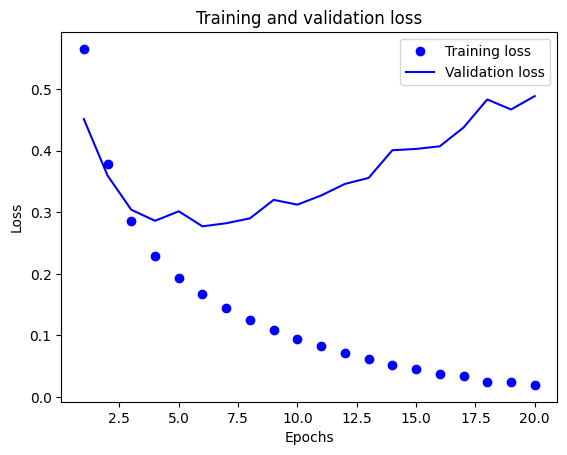

In [ ]:
epochs = range(1, len(history_dict['accuracy'])+1)
plt.plot(epochs, history_dict['loss'], 'bo', label="Training loss")
plt.plot(epochs, history_dict["val_loss"], 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

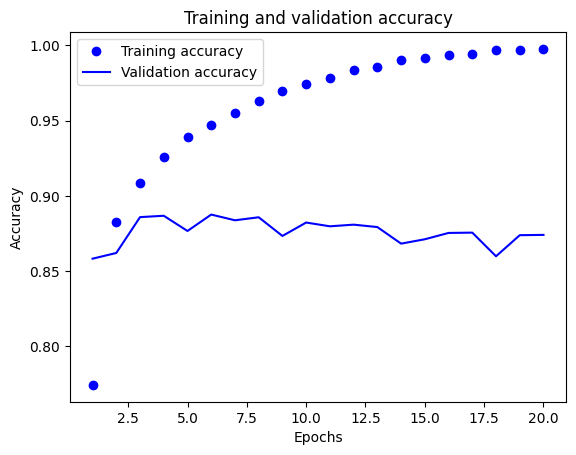

In [ ]:
plt.clf()
plt.plot(epochs, history_dict["accuracy"], 'bo', label="Training accuracy")
plt.plot(epochs, history_dict["val_accuracy"], 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
(mnist_train_data, mnist_train_labels), (mnist_test_data, mnist_test_labels) = mnist.load_data()

In [ ]:
mnist_train_data.shape

(60000, 28, 28)

In [ ]:
mnist_train_labels.shape

(60000,)

In [ ]:
mnist_train_data = mnist_train_data.reshape((60000, 28*28))
mnist_train_data = mnist_train_data.astype('float32')/255

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(28*28,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mnist_valid_data = mnist_train_data[:10000]
mnist_valid_label = mnist_train_labels[:10000]


In [ ]:
history = model.fit(mnist_train_data, mnist_train_labels, epochs=10, batch_size=1000, validation_data=(mnist_valid_data, mnist_valid_label))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9545 - loss: 0.1550 - val_accuracy: 0.9560 - val_loss: 0.1432
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9541 - loss: 0.1531 - val_accuracy: 0.9553 - val_loss: 0.1426
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9554 - loss: 0.1517 - val_accuracy: 0.9575 - val_loss: 0.1406
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9553 - loss: 0.1525 - val_accuracy: 0.9579 - val_loss: 0.1379
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9577 - loss: 0.1448 - val_accuracy: 0.9569 - val_loss: 0.1374
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9591 - loss: 0.1424 - val_accuracy: 0.9591 - val_loss: 0.1346
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9573 - loss: 0.1416 - val_accuracy: 0.9587 - val_loss: 0.1340
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9576 - loss: 0.1465 - val_accuracy: 0.9612 - val_loss: